# Lead Score - Case Study

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>

## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


In [265]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [266]:
#Set_option to avoid truncation of columns and rows:-

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## <b> Step 1: Reading and understanding the data

Let us first import NumPy and Pandas and read the leads dataset

In [267]:
# Loading the data using Pandas
leads = pd.read_csv('Leads.csv')
leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


Inspect the various aspects of the leads dataframe

In [268]:
# Let's look at the type of each columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

It appears that this dataset has a significant number of category variables, for which we will need to build dummy variables. Additionally, there are numerous null values, so we must deal them appropriately.

In [269]:
#To get the idea of how the table looks like we can use .head() or .tail() command
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [270]:
#  Let's look at the dimensions of the dataframe
leads.shape

(9240, 37)

In [271]:
#Let's look at the statistical aspects of the dataframe
leads.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


In [272]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

## <b> Step 2: Data Cleaning

In [273]:
# 'Prospect ID' and 'Lead Number' are just unique ID/number assigned for every lead which won't contribute much to our analysis
print(leads['Prospect ID'].duplicated().sum())
print(leads['Lead Number'].duplicated().sum())

0
0


In [274]:
# As there are no duplicate values in 'Lead Number' and 'Prospect ID', we can be sure that these variables won't contribute much to our analysis
# dropping these two columns
leads = leads.drop(['Prospect ID', 'Lead Number'], axis=1)

Checking for missing values and imputing them

In [275]:
# Adding up the mssing values (column-wise)
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [276]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum() / len(leads.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [277]:
#dropping columns with more than 40% missing values
cols = leads.columns
for i in cols:
    if ((100*(leads[i].isnull().sum()/len(leads.index))) >= 40):
            leads.drop(i,axis=1,inplace=True)

In [278]:
#checking columns again after dropping the ones where missing value was greater than 40%
round(100*(leads.isnull().sum() / len(leads.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Also note that when you received the value counts for all the columns, some of them had only one value that predominated among all the data points.
These include Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque.
It is preferable to remove these columns because they wont aid in our analysis and almost all of the values for these variables are No.

In [279]:
leads.drop(['Do Not Call','Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'],axis=1,inplace=True)

Numerical Variable Analysis

Dealing with missing values for numerical columns

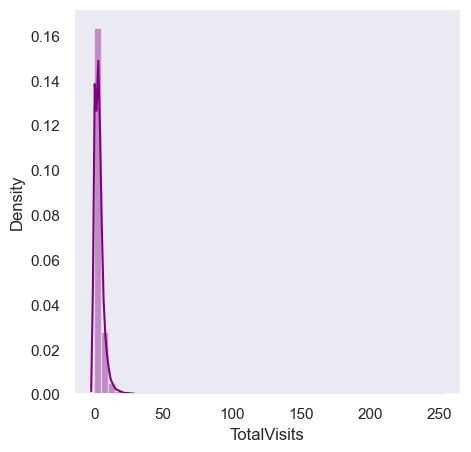

In [280]:
#Looking at the distribution for the column TotalVisits
plt.figure(figsize=(5,5))
sns.set(style='dark')
sns.distplot(leads.TotalVisits,color='purple',kde=True)
plt.show()

In [281]:
# Check the skewness in the 'TotalVisits' column
print(leads['TotalVisits'].skew())

19.911657340056212


TotalVisits -is a numerical variable.We will first call skew() on this column to get the skewness.
- A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.
- If the data is normally distributed,we can easily fill it by mean(as mean=median=mode for bellcurve)
- If it is skewed then filling by mean becomes an issue - we fill it by MEDIAN in that case.

<br>The following steps can help in achieving the same
a)leads['TotalVisits'].skew()
b)Here the skewness value is 19.911,so we will fill the missing entries by MEDIAN.i.e leads['TotalVisits'].fillna(leads['TotalVisits'].median(),inplace=True)

In [282]:
leads['TotalVisits'].fillna(leads['TotalVisits'].median(),inplace=True)

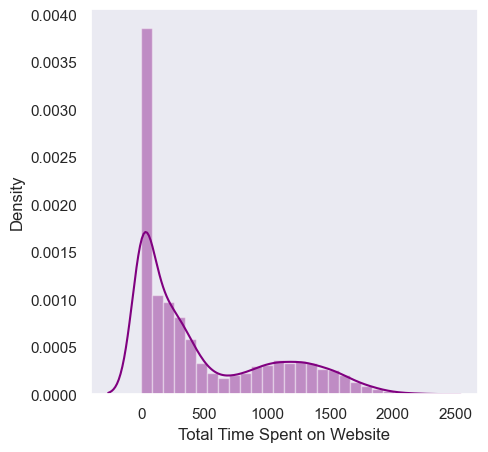

In [283]:
#Looking at the distribution for the column Total Time Spent on Website
plt.figure(figsize=(5,5))
sns.set(style='dark')
sns.distplot(leads['Total Time Spent on Website'],color='purple',kde=True)
plt.show()

In [284]:
print(leads['Total Time Spent on Website'].skew())

0.9564501929530472


Total Time Spent on Website -is a numerical variable.We will first call skew() on this column to get the skewness.
- A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.
- If the data is normally distributed,we can easily fill it by mean(as mean=median=mode for bellcurve)
- If it is skewed then filling by mean becomes an issue - we fill it by MEDIAN in that case.

<br>The following steps can help in achieving the same a)leads['Total Time Spent on Website'].skew() b)Here the skewness value is 0.956,so we will fill the missing entries by MEDIAN.i.e leads['Total Time Spent on Website'].fillna(leads['Total Time Spent on Website'].median(),inplace=True)

In [285]:
leads['Total Time Spent on Website'].fillna(leads['Total Time Spent on Website'],inplace=True)

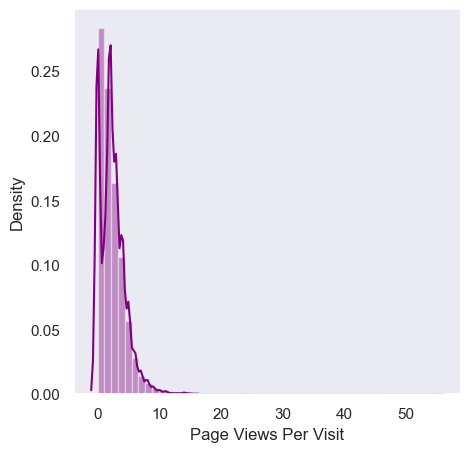

In [286]:
#Looking at the distribution for the column Page Views Per Visit
plt.figure(figsize=(5,5))
sns.set(style='dark')
sns.distplot(leads['Page Views Per Visit'],color='purple')
plt.show()

In [287]:
print(leads['Page Views Per Visit'].skew())

2.871792896566408


Page Views Per Visit -is a numerical variable.We will first call skew() on this column to get the skewness.
- A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.
- If the data is normally distributed,we can easily fill it by mean(as mean=median=mode for bellcurve)
- If it is skewed then filling by mean becomes an issue - we fill it by MEDIAN in that case.

The following steps can help in achieving the same a)leads['Page Views Per Visit'].skew() b)Here the skewness value is 2.8717,so we will fill the missing entries by MEDIAN.i.e leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median(),inplace=True)

In [288]:
leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median(),inplace=True)

In [289]:
#rechecking the null values
round(100*(leads.isnull().sum() / len(leads.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Profile                                     29.32
City                                             15.37
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
dtype: flo

Categorical Variable Analysis

In [290]:
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [291]:
#For categorical variable , replace the NaN values with the mode ,i.e, 'India' here
leads['Country'].replace(np.nan,'India',inplace=True)

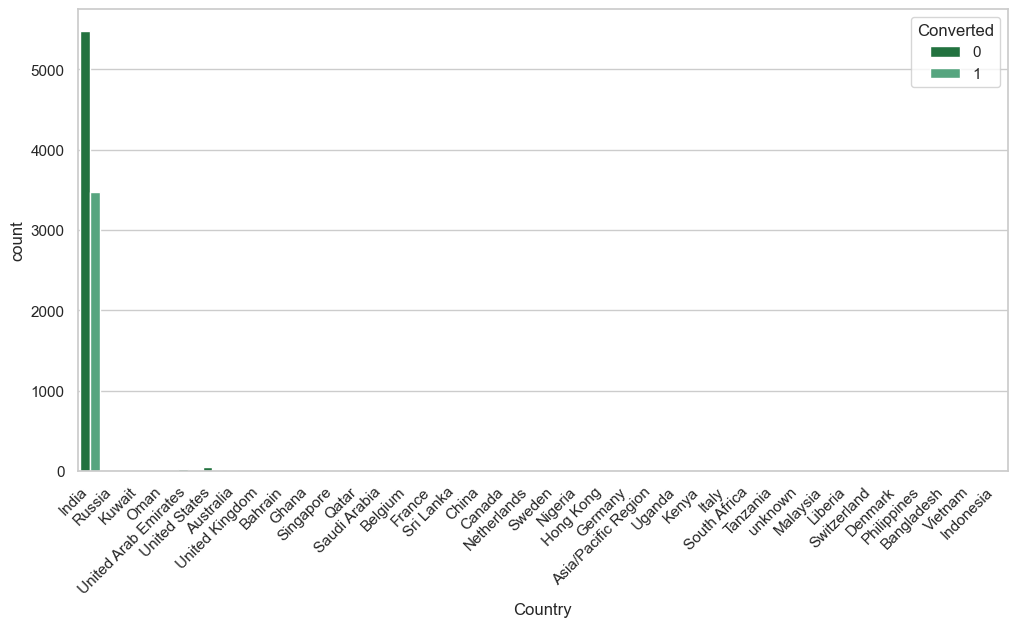

In [292]:
# plotting graph for 'Country' columnn after replacing NaN values

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=leads, x='Country', palette=sns.color_palette("BuGn_r", n_colors=4), hue='Converted', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.show()


As you might be able to interpret, the variable Country wont contribute much in our analysis as more than 97% of the data is for a single country 'India'. So it is best that we drop it.

In [293]:
leads.drop(['Country'], axis=1, inplace=True)

In [294]:
leads['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [295]:
#For categorical variable , replace the NaN values with the mode ,i.e, 'Mumbai' here
leads['City'].replace(np.nan, 'Mumbai',inplace=True)

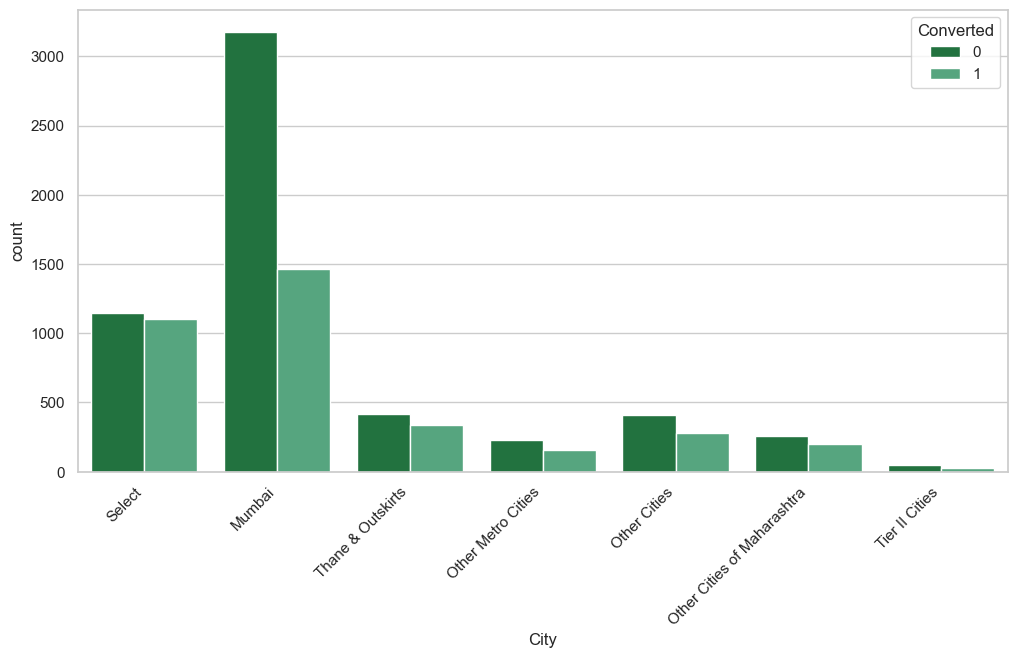

In [296]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=leads, x='City', palette=sns.color_palette("BuGn_r", n_colors=4), hue='Converted', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.show()

You may be able to deduce that the variable City wont have a significant impact on our analysis because the majority of the data pertains to the single city of Mumbai. Additionally, a sizable portion of the data has the value "Select" indicating that the lead did not choose any options for that column.

In [297]:
leads.drop(['City'], axis=1, inplace=True)

We just checked that for City column we have values like 'Select' which actually isn't helpful for analysis.The reason being - That level simply indicates that the student did not choose the choice for that particular column, which is why it says "Select" in those columns. These values are equivalent to missing values, thus we must determine the level 'Select' value counts over all of the columns where they are present.

In [298]:
for cols in leads:
    print(leads[cols].astype("category").value_counts())
    print("*" * 50)
    print()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
**************************************************

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64
**************************************************

No     8506
Yes     734
Name: Do Not Email, dtype: int64
**************************************************

0    5679
1    35

There are three columns which have 'Select' values as most of their entries - How did you hear about X Education,  Specialization, Lead Profile 

In [299]:
leads['Specialization'].replace('Select', np.nan,inplace=True)

In [300]:
leads['Lead Profile'].replace('Select', np.nan,inplace=True)

In [301]:
leads['How did you hear about X Education'].replace('Select', np.nan,inplace=True)

In [302]:
# Check the number of null values again

round(100*(leads.isnull().sum() / len(leads.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Profile                                     74.19
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
dtype: float64

The levels 'Lead Profile' and 'How did you hear about X Education' have a large number of rows with the value Select/null values, which is useless to the analysis, so we should remove them.

In [303]:
leads.drop(['How did you hear about X Education', 'Lead Profile'] , axis=1, inplace=True)

Imputing missing values for categorical columns

1)METRIC SUGGESTION FOR COLUMN -'Specialization'
Since Specialization is a categorical variable, MODE can be used in columns where there are missing values. The actions listed below can assist in achieving the same -
- leads['Specialization'].unique()
- leads['Specialization'].value_counts()
- leads['Specialization'].mode()[0]
- leads['Specialization'].fillna(leads['Specialization'].mode()[0],inplace=True)

In [304]:
leads['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [305]:
leads['Specialization'].mode()[0]

'Finance Management'

In [306]:
leads['Specialization'].fillna(leads['Specialization'].mode()[0],inplace=True)

METRIC SUGGESTION FOR COLUMN -'What is your current occupation' Since What is your current occupation is a categorical variable, MODE can be used in columns where there are missing values. The actions listed below can assist in achieving the same -
- leads['What is your current occupation'].unique()
- leads['What is your current occupation'].value_counts()
- leads['What is your current occupation'].mode()[0]
- leads['What is your current occupation'].fillna(leads['What is your current occupation'].mode()[0],inplace=True)

In [307]:
leads['What is your current occupation'].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

In [308]:
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [309]:
leads['What is your current occupation'].mode()[0]

'Unemployed'

In [310]:
leads['What is your current occupation'].fillna(leads['What is your current occupation'].mode()[0],inplace=True)

As described above,similar approach can be used to impute missing values for other categorical variables like -Lead Source,What matters most to you in choosing a course etc

In [311]:
leads['What matters most to you in choosing a course'].fillna(leads['What matters most to you in choosing a course'].mode()[0],inplace=True)

In [312]:
leads['Lead Source'].fillna(leads['Lead Source'].mode()[0],inplace=True)

In [313]:
leads['Last Activity'].fillna(leads['Last Activity'].mode()[0],inplace=True)

The column 'Tags' is not important and won't contribute much in the analysis.So we can DROP it!

In [314]:
leads.drop(['Tags'], axis=1, inplace=True)

In [315]:
#Rechecking for null values
leads.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
A free copy of Mastering The Interview           0
Last Notable Activity                            0
dtype: int64

No more null values in the dataset!

## <b> Step 3: EDA

In [316]:
#Columns chosen for analysis
columns_numerical=['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
columns_categorical =['Lead Source', 'Lead Origin',
                      'What is your current occupation', 'What matters most to you in choosing a course', 
                      'A free copy of Mastering The Interview','Specialization', 'Do Not Email',
                      'Last Notable Activity','Last Activity']

##### Class imbalance

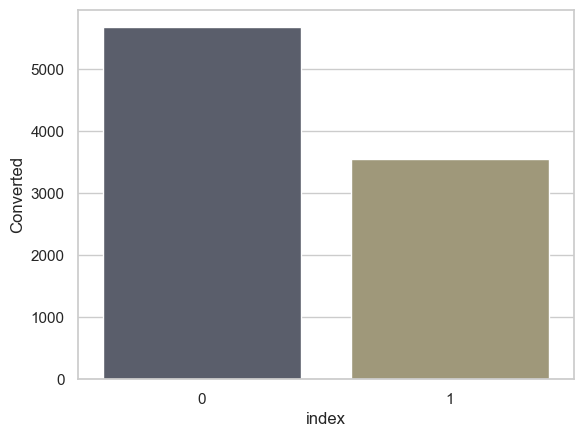

In [317]:
#### Check for data imbalance 
target_col = ["Converted"]
new_df = leads[target_col[0]].value_counts().reset_index()
sns.barplot(x = "index", y = "Converted", data=new_df, palette = "cividis");
#Data is slightly imbalanced

##### Univariate Analysis

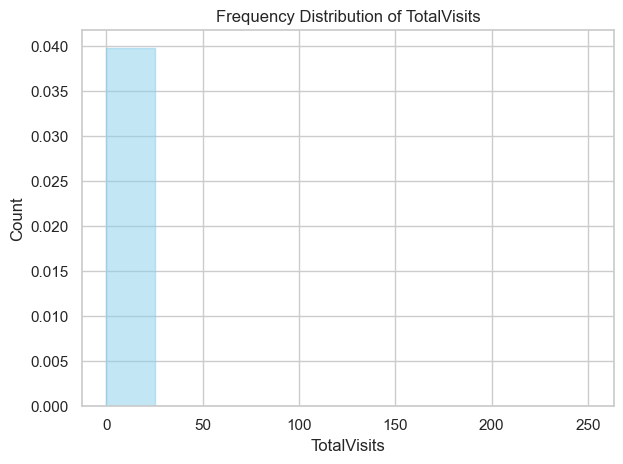

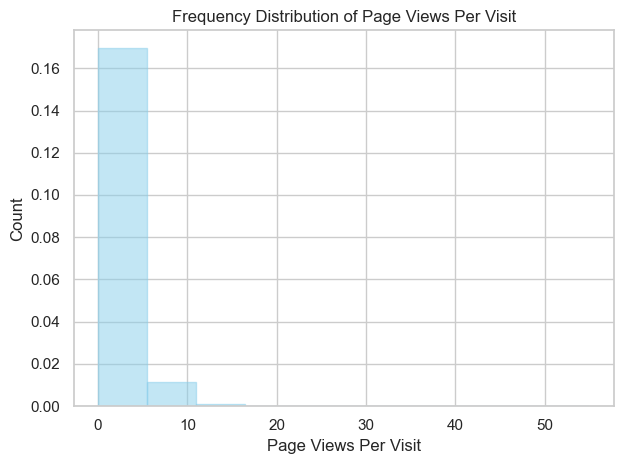

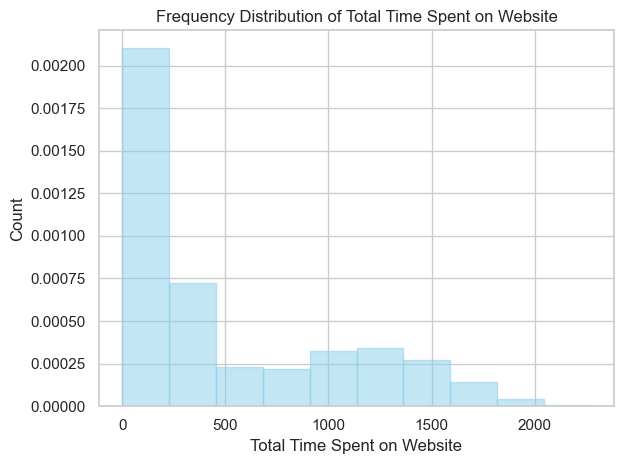

In [318]:
#Histogram - for bucket-wise distibution of continuous columns
for j in columns_numerical:
    
    #sns.histplot(application[i])
    plt.hist(leads[j],density = 1, 
                            color = "skyblue", ec="skyblue",
                            alpha = 0.5,
                            )
    plt.title("Frequency Distribution of "+j)
    plt.xlabel(j)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

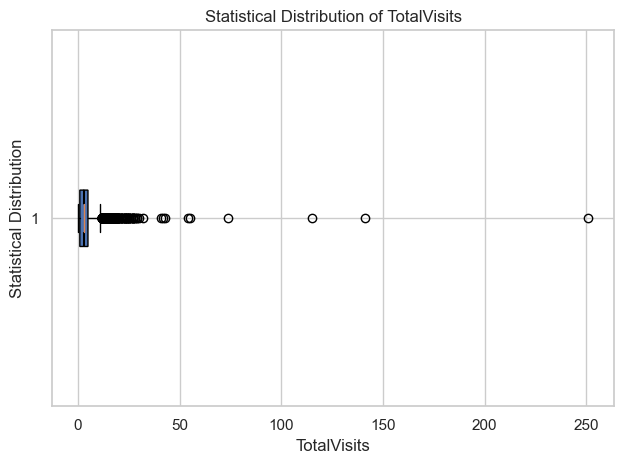

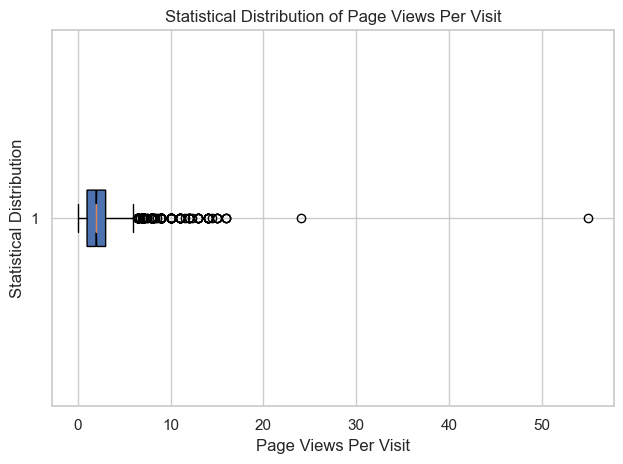

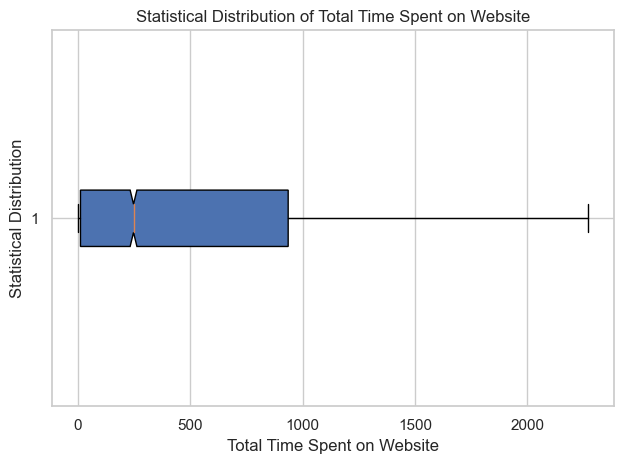

In [319]:
#Boxplot - for statistical distibution of continuous columns

for i in columns_numerical:
    plt.boxplot(leads[i],patch_artist = True,
                notch ='True', vert = 0)
    plt.xlabel(i)
    plt.ylabel("Statistical Distribution")
    plt.title('Statistical Distribution of '+ i)
    plt.tight_layout()
    plt.show()

We see presence of outliers in 'TotalVisits' and 'Page Views Per Visit' columns!

##### Handling Outliers

In [320]:
leads['TotalVisits'].describe().transpose()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

We see the difference between max and 75% percentile is very high which should make us suspicious!

In [321]:
leads.TotalVisits.quantile([0.5,0.7,0.9,0.95,0.99])

0.50     3.0
0.70     4.0
0.90     7.0
0.95    10.0
0.99    17.0
Name: TotalVisits, dtype: float64

On further examining leads[leads.TotalVisits>10].describe(),we see
these are not invalid records and their removal can affect analysis 

Gives us value of 7,10 and 17 at 90th,95th and 99th percentile.Remove the outliers by capping it to 95th percentile.

In [322]:
# removing statistical outliers
# Generally we condider 25th percentile as Q1 and 75th as Q3.But here,we want to take a more safer approach thats why we are going with 5th and 95th percentile.

Q1 = leads.TotalVisits.quantile(0.05)
Q3 =leads.TotalVisits.quantile(0.95)
IQR = Q3 - Q1
leads = leads[(leads.TotalVisits >= Q1 - 1.5 * IQR) & (leads.TotalVisits <= Q3 + 1.5 * IQR)]

In [323]:
leads['Page Views Per Visit'].describe().transpose()

count    9218.000000
mean        2.344895
std         2.063849
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        24.000000
Name: Page Views Per Visit, dtype: float64

We see the difference between max and 75% percentile is very high which should make us suspicious!

In [324]:
leads['Page Views Per Visit'].quantile([0.5,0.7,0.9,0.95,0.99])

0.50    2.0
0.70    3.0
0.90    5.0
0.95    6.0
0.99    9.0
Name: Page Views Per Visit, dtype: float64

In [325]:
# removing statistical outliers
# Generally we condider 25th percentile as Q1 and 75th as Q3.But here,we want to take a more safer approach thats why we are going with 5th and 95th percentile.

Q1 = leads['Page Views Per Visit'].quantile(0.05)
Q3 =leads['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
leads = leads[(leads['Page Views Per Visit'] >= Q1 - 1.5 * IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5 * IQR)]

##### Bivariate Analysis

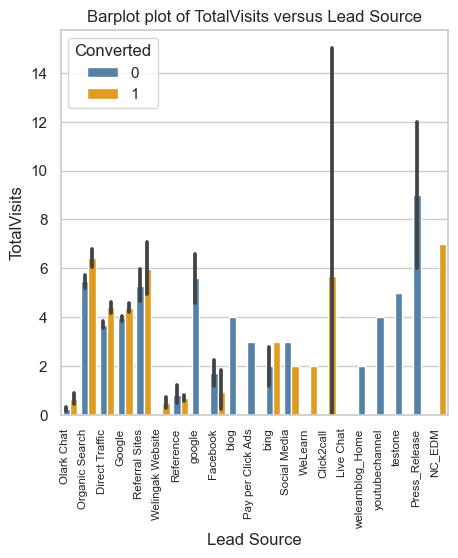

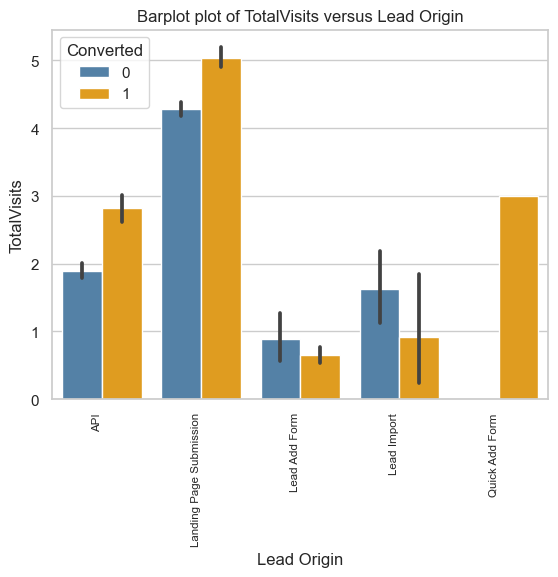

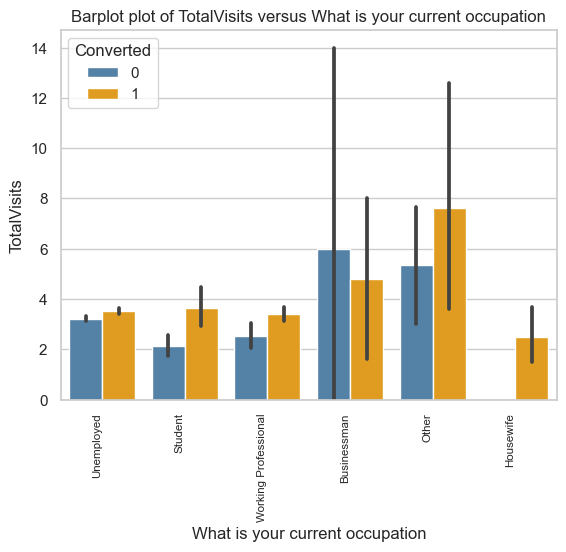

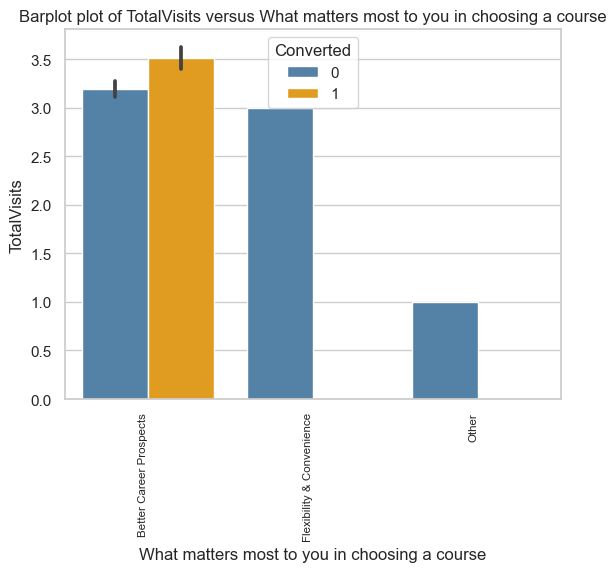

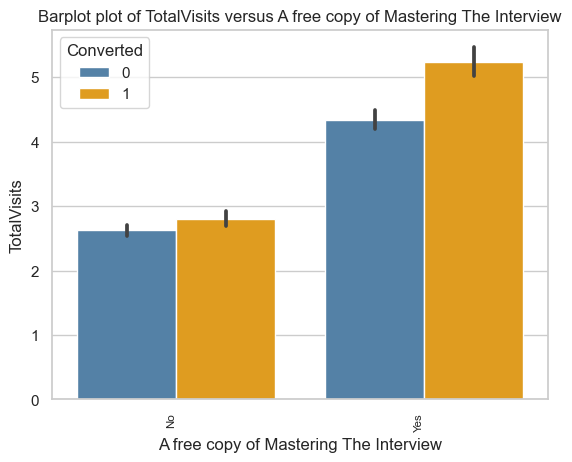

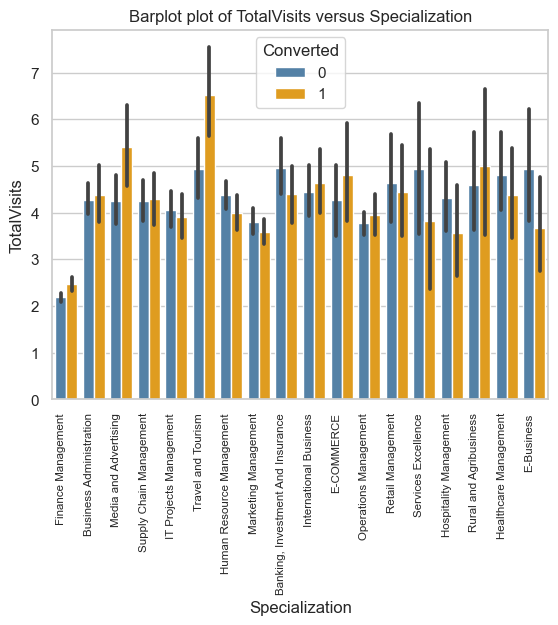

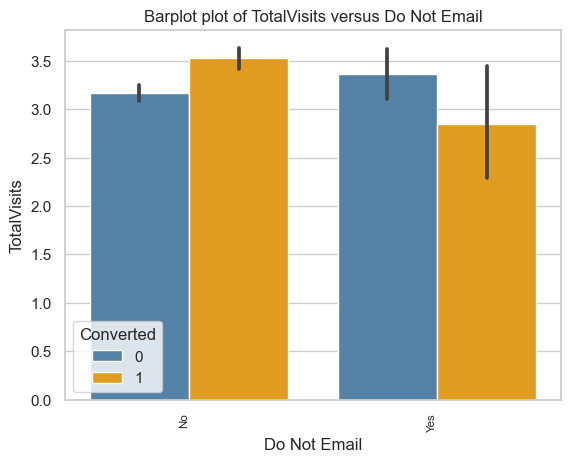

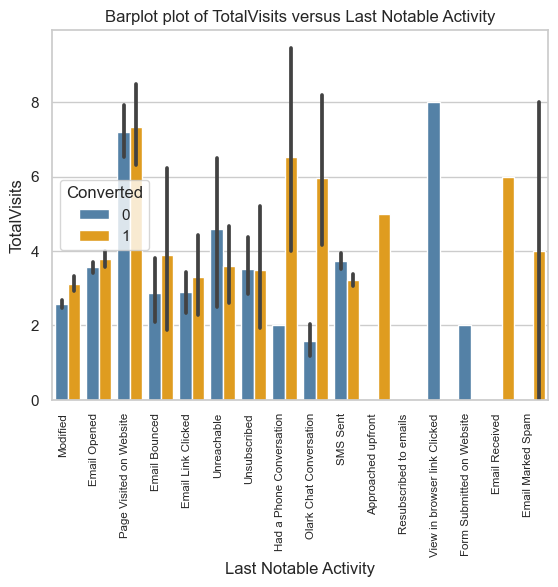

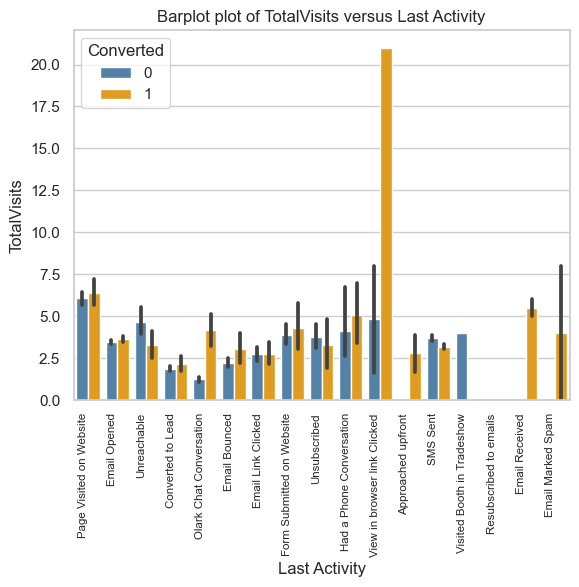

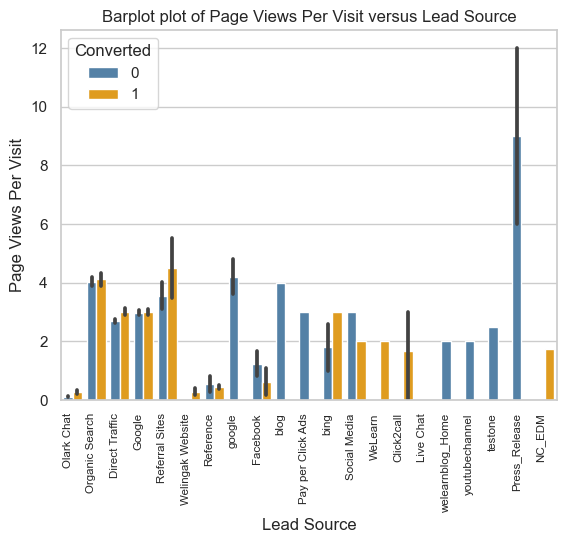

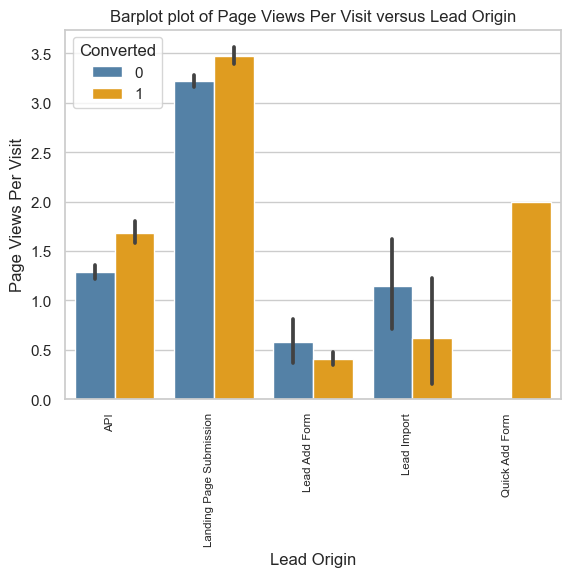

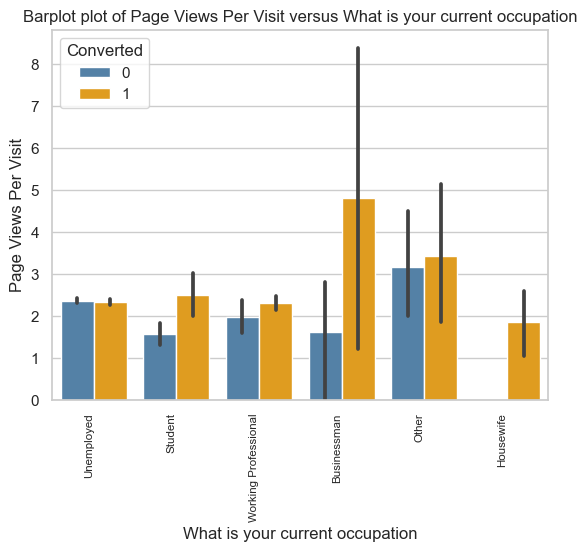

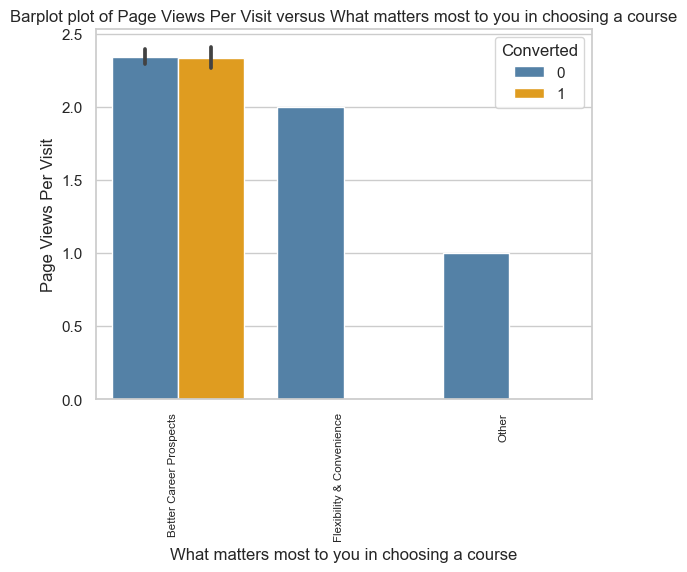

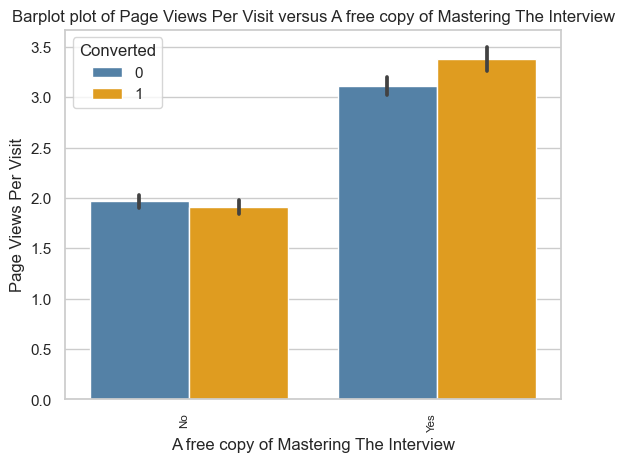

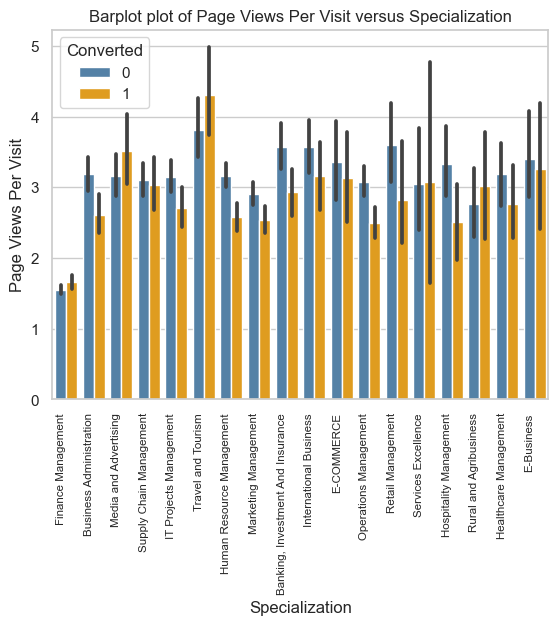

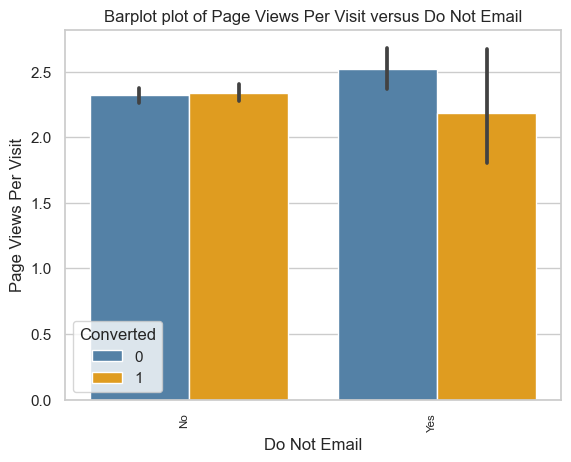

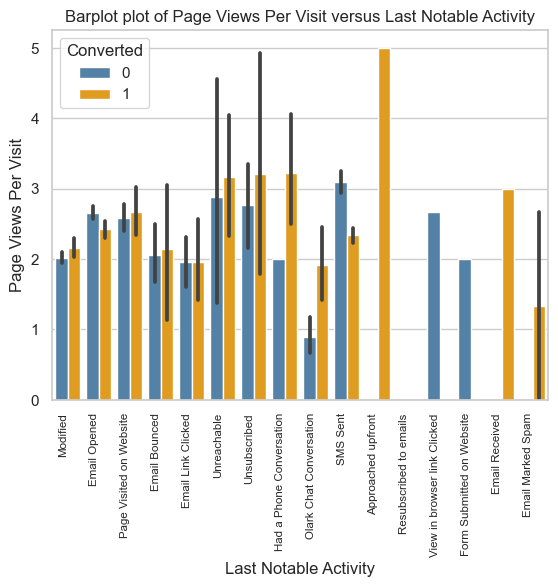

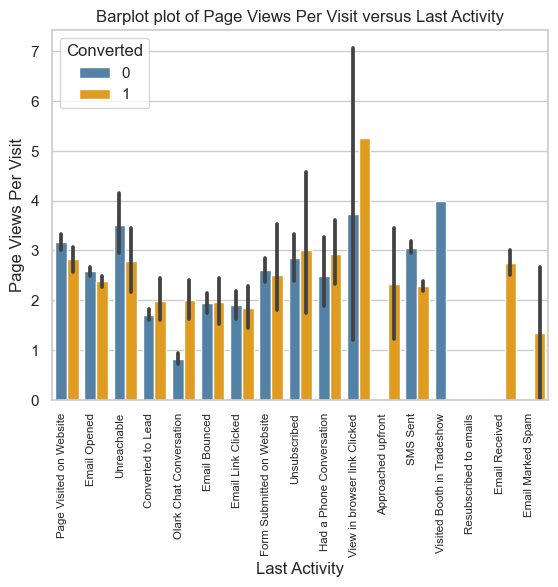

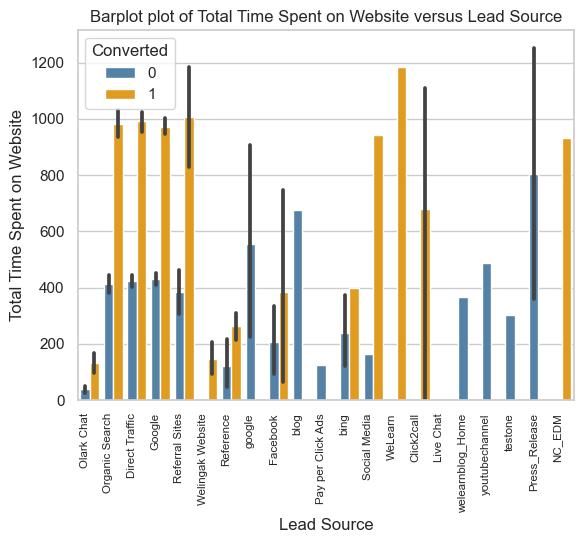

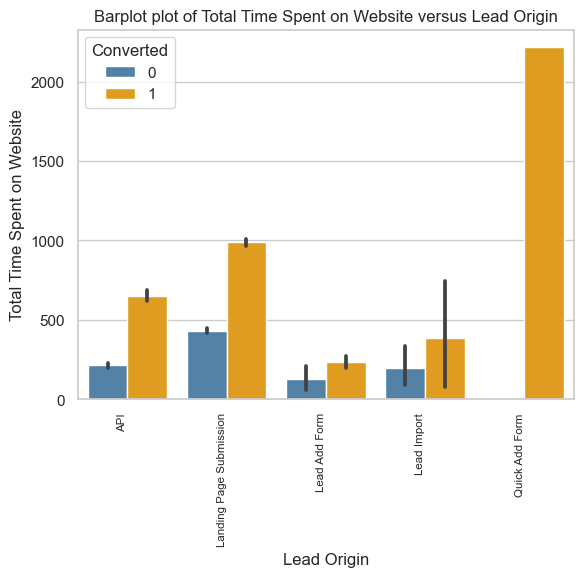

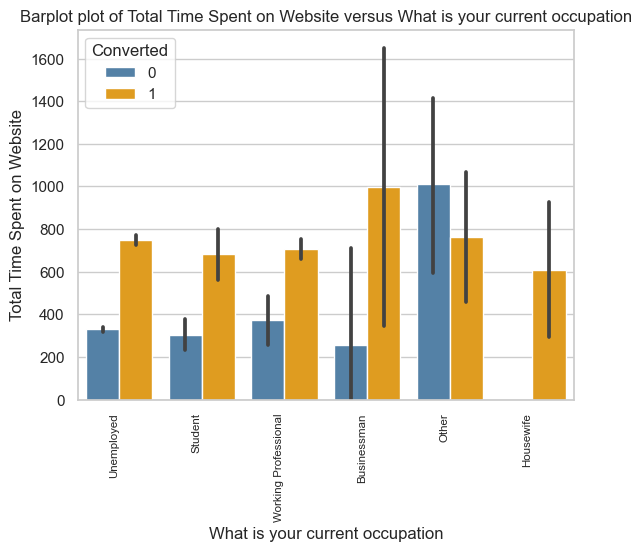

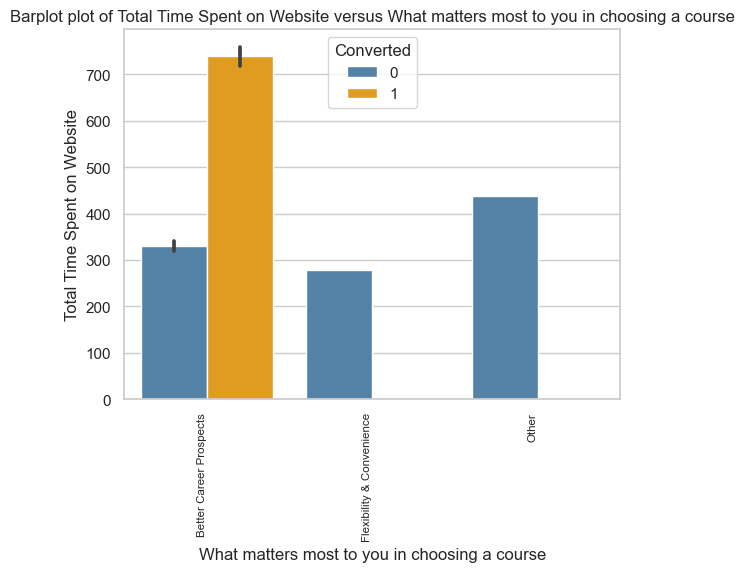

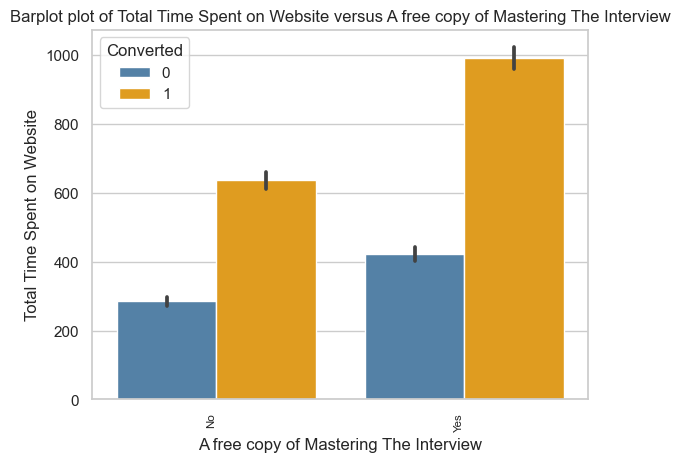

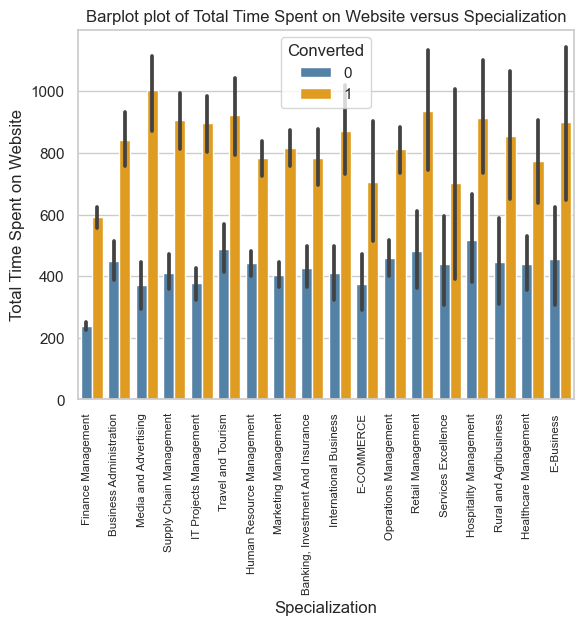

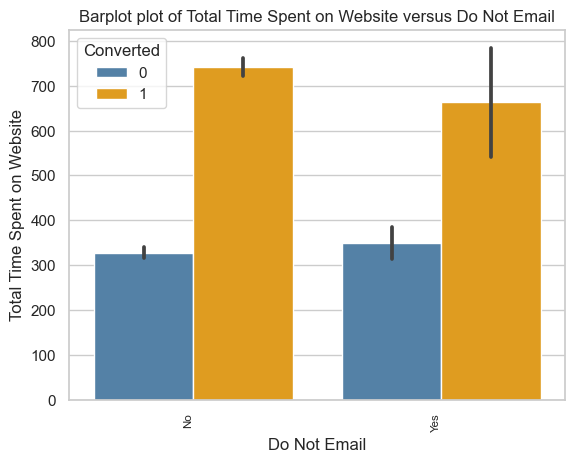

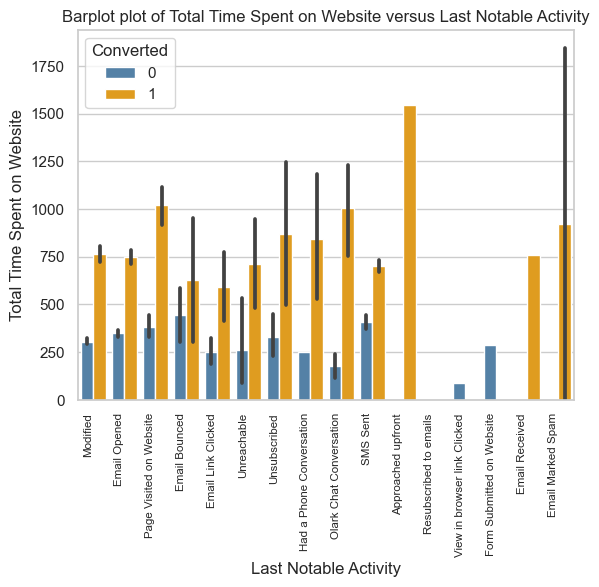

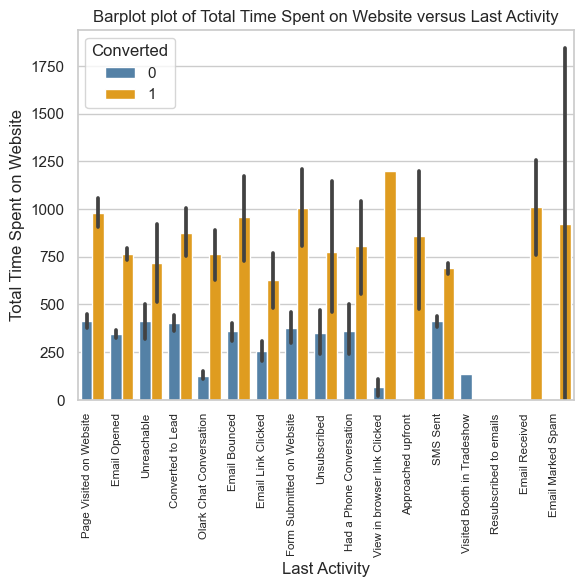

In [326]:
color = ['steelblue','orange']
plt.figure(figsize=(5,5))
for i in columns_numerical:
    for j in columns_categorical:
            sns.barplot(y=leads[i],x=leads[j],hue=leads.Converted, palette=color)
            plt.xticks(
            rotation=90, 
            horizontalalignment='right',
            fontweight='light',
            fontsize='x-small'  
            )
            plt.title("Barplot plot of "+ i + " versus "+ j)
            plt.show()

<Figure size 1200x600 with 0 Axes>

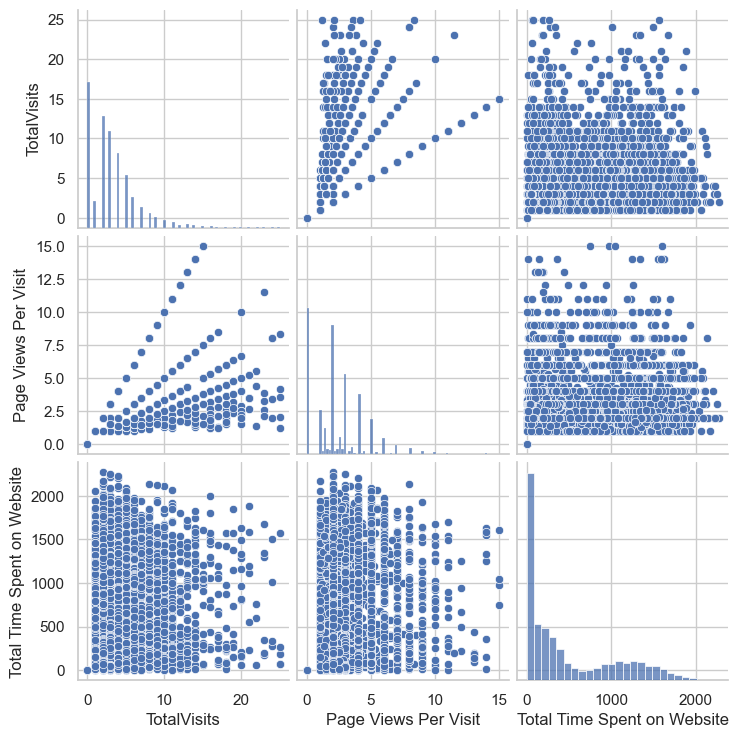

In [327]:
# visualizing the numeric variable
plt.figure(figsize=(12,6))
sns.pairplot(leads[columns_numerical], markers=["o", "s"])
plt.show()

Multivariate Analysis

<AxesSubplot:>

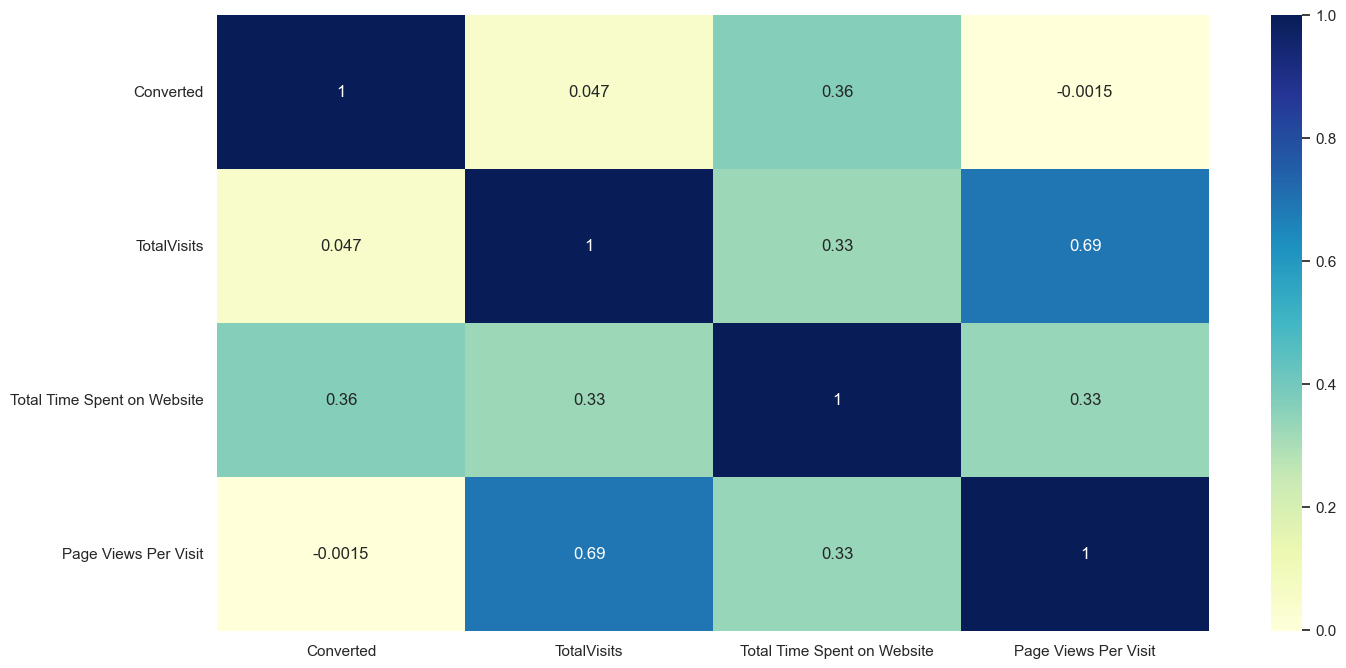

In [328]:
# Visualizing the correlation between all set of columns
plt.figure(figsize=(16, 8))
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)


## <b> Step 4: Data Preparation

Converting some binary variables 'Yes/No' to 0/1

In [329]:
# List of variables to map
varList =['Do Not Email', 'A free copy of Mastering The Interview']

#Defining the map function
def binary_map(x):
    return x.map({"Yes":1 , "No": 0})

# Applying the function to the leads list
leads[varList] = leads[varList].apply(binary_map)

In [330]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Better Career Prospects,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Better Career Prospects,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Better Career Prospects,0,Modified


For categorical variables with multiple levels,create dummy features(one-level encoding)

In [331]:
# Creating dummy variables for some of the categorical features and dropping the first one
dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation', 'Last Activity',
                                'What matters most to you in choosing a course',
                                'Last Notable Activity']], drop_first = True)


# Adding the result to the master dataframe
leads = pd.concat([leads,dummy1], axis = 1)

In [332]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Better Career Prospects,0,Modified,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Better Career Prospects,0,Email Opened,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,1,Email Opened,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,0,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [333]:
# We have created dummy for the below variables,so we can go ahead and drop the original variables!
leads = leads.drop(['Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation', 'Last Activity',
                                'What matters most to you in choosing a course',
                                'Last Notable Activity'], axis = 1)

In [334]:
from sklearn.model_selection import train_test_split

# Putting feature variables to X
X = leads.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [335]:
y = leads['Converted']

In [336]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

## <b> Step 5: Feature Scaling

In [337]:
from sklearn.preprocessing import StandardScaler

In [338]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4700,0,-1.025537,-0.893058,-1.154115,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4992,0,0.827816,-0.695041,1.809086,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7933,0,-1.025537,-0.893058,-1.154115,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1427,0,-0.098861,0.075226,-0.413315,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2868,0,-0.407753,0.565727,-0.166382,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


The 'fit_transform' command first fits the data to have a mean of 0 and a standard deviation of 1, i.e. it scales all the variables using:
Xscaled = (X−μ)/σ
Now, once this is done, all the variables are transformed using this formula. Now, when you go ahead to the test set, you want the variables to not learn anything new. You want to use the old centralisation that you had when you used fit on the train dataset. And this is why you don't apply 'fit' on the test data, just the 'transform'.

## <b> Step 6 : Looking at correlations

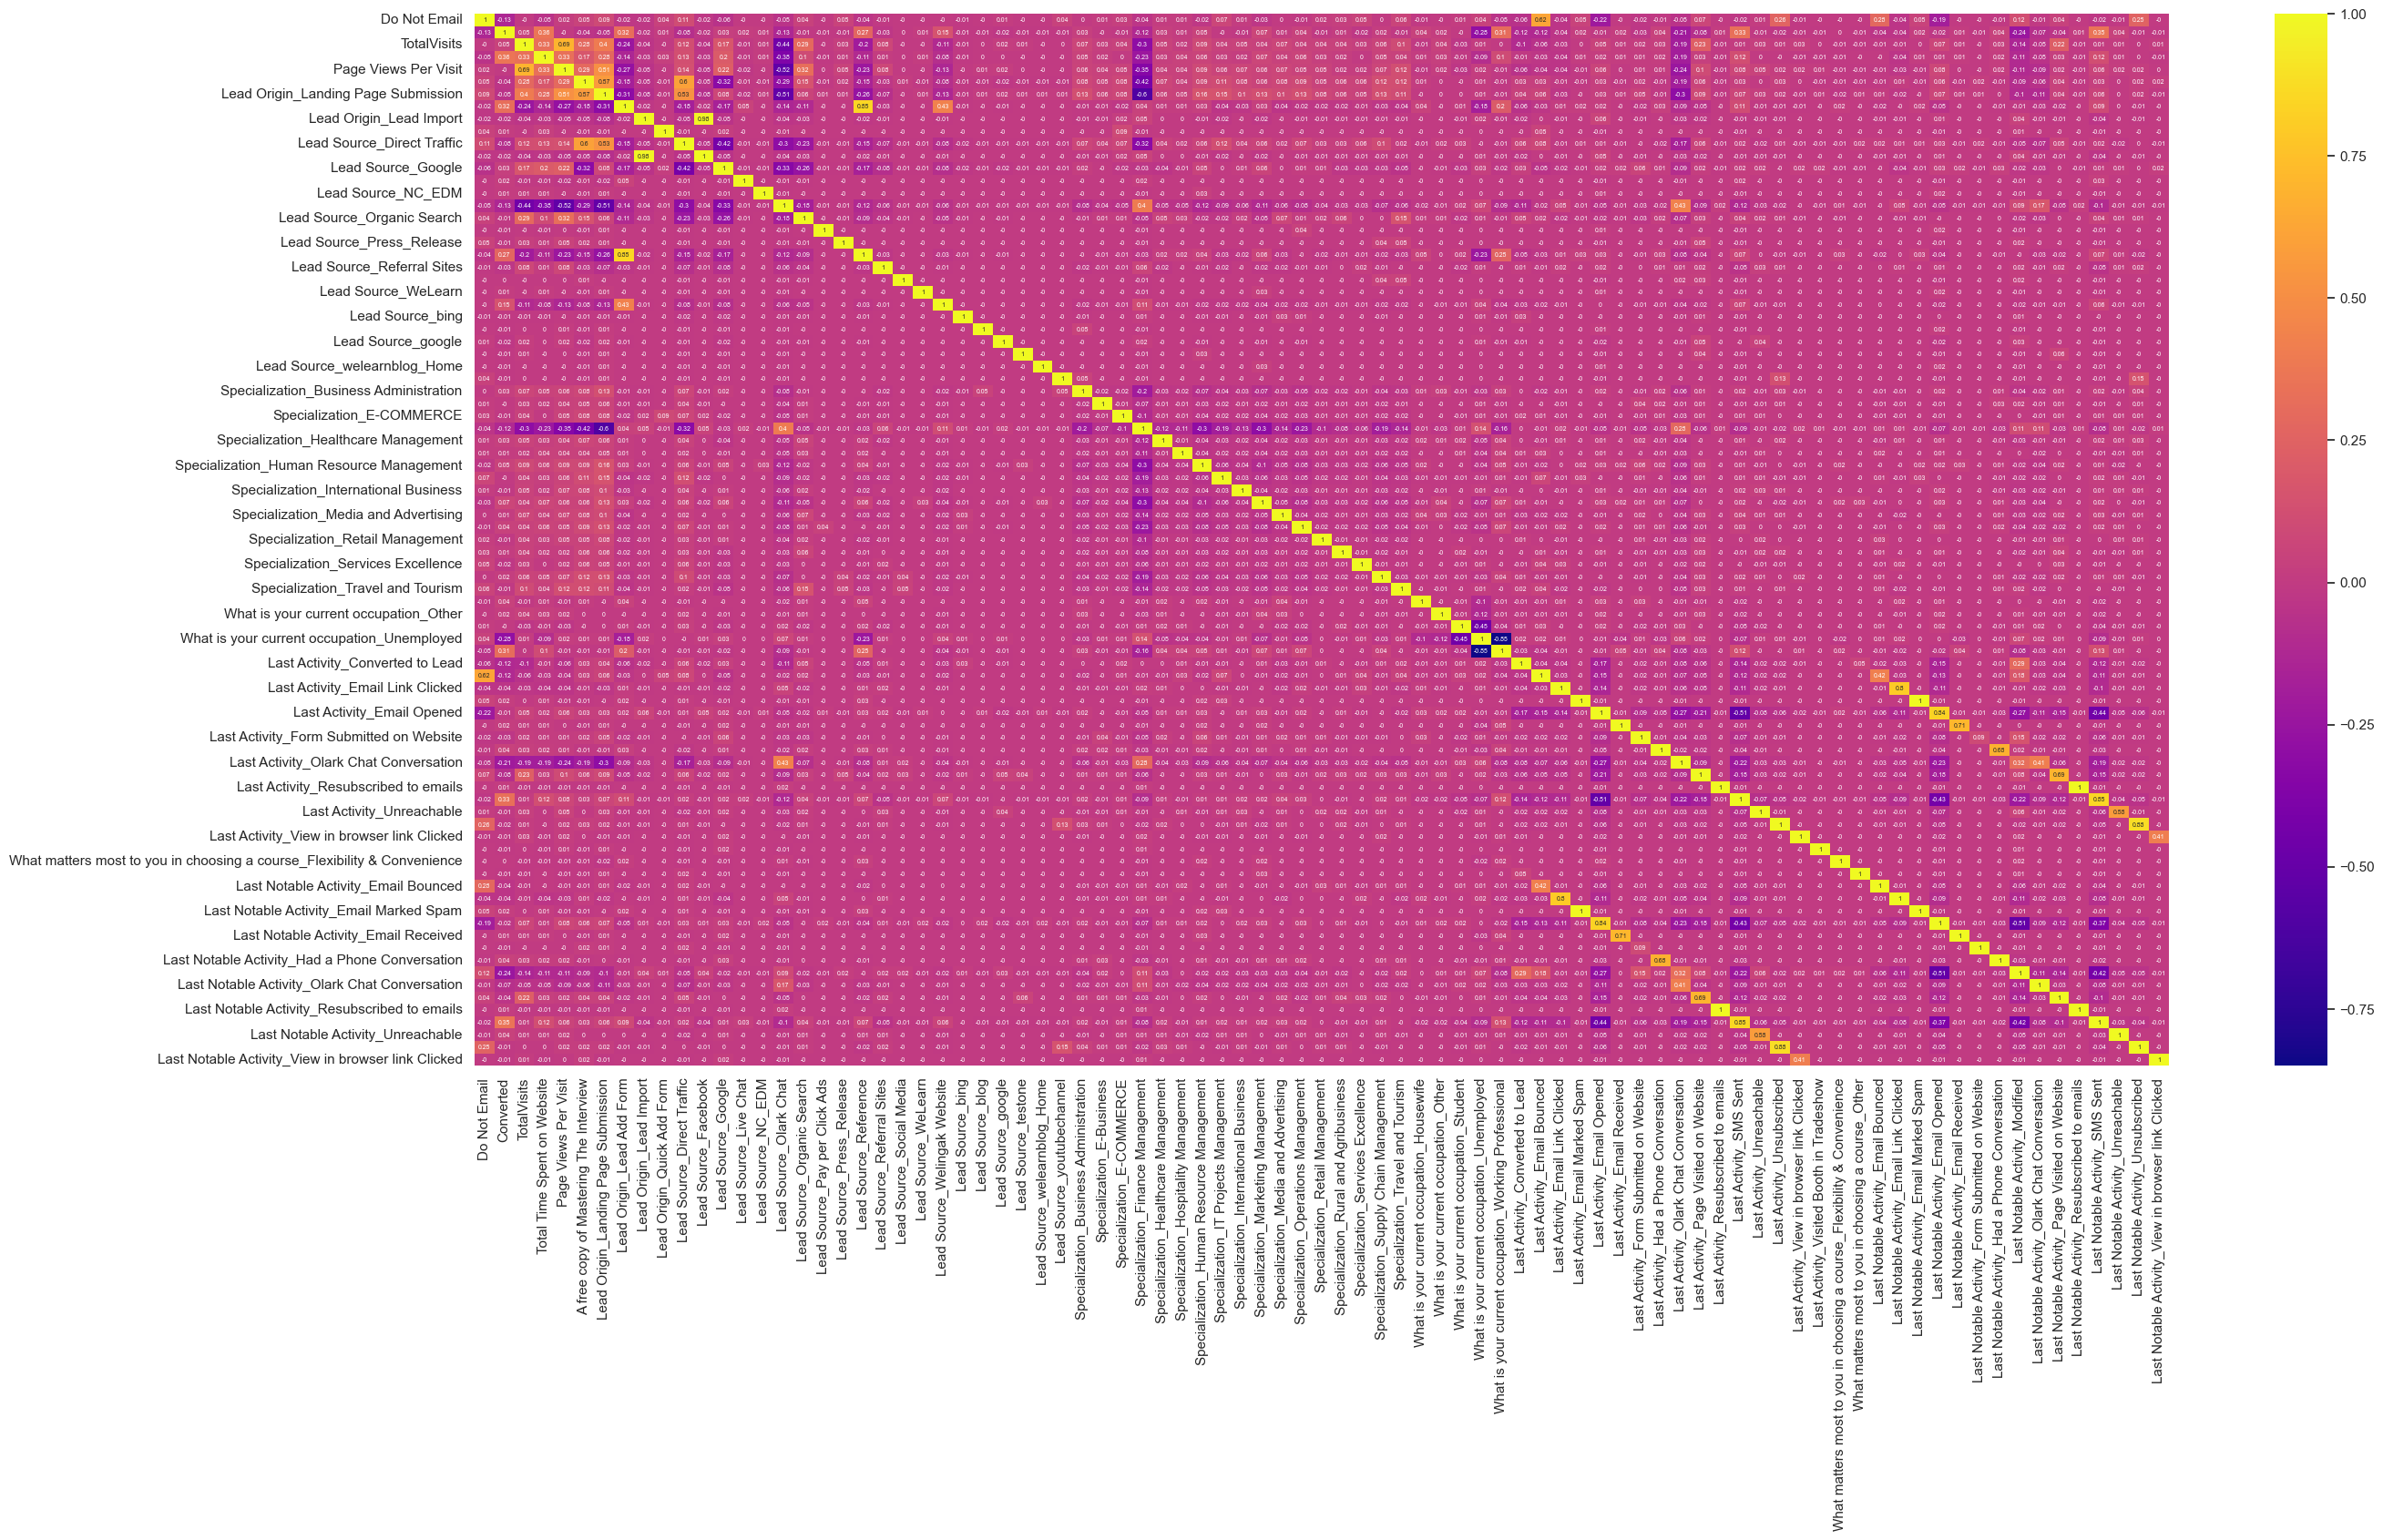

In [339]:
# let's see the correlation matrix
plt.figure(figsize = (30,15))
sns.heatmap(round(leads.corr(),2), annot=True, cmap ='plasma', annot_kws={'fontsize':5})
plt.show()

## <b> Step 7: Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

Running your first training model


In [340]:
import statsmodels.api as sm

In [341]:
#Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6370
Model Family:                Binomial   Df Model:                           78
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2602.3
Date:                Tue, 18 Apr 2023   Deviance:                       5204.6
Time:                        14:57:22   Pearson chi2:                 7.18e+03
No. Iterations:                    29   Pseudo R-squ. (CS):             0.4117
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      30.3243   2.62e+06   1.16e-05      1.000   -5.14e+06    5.14e+06
Do Not Email                                                               -1.1925      0.215     -5.552      0.000      -1.613      -0.772
TotalVisits                                                                 0.2802      0.049      5.662      0.000       0.183       0.377
Total Time Spent on Website                                                 1.1256      0.041     27.381      0.000       1.045       1.206
Page Views Per Visit                                                       -0.2982      0.055     -5.447      0.000      -0.406      -0.191
A free copy of Mastering The Interview                                     -0.1015      0.108     -0.939      0.348      -0.313       0.110
Lead Origin_Landing Page Submission                                        -0.3315      0.118     -2.798      0.005      -0.564      -0.099
Lead Origin_Lead Add Form                                                   2.8841      0.617      4.674      0.000       1.675       4.093
Lead Origin_Lead Import                                                     1.3120      1.552      0.845      0.398      -1.730       4.354
Lead Origin_Quick Add Form                                              -1.006e-06      0.332  -3.03e-06      1.000      -0.650       0.650
Lead Source_Direct Traffic                                                  0.3311      1.422      0.233      0.816      -2.457       3.119
Lead Source_Facebook                                                       -0.2498      2.100     -0.119      0.905      -4.366       3.866
Lead Source_Google                                                          0.5306      1.417      0.374      0.708      -2.247       3.308
Lead Source_Live Chat                                                     366.9442   4.75e+07   7.73e-06      1.000    -9.3e+07     9.3e+07
Lead Source_NC_EDM                                                         41.8002   6.71e+07   6.23e-07      1.000   -1.32e+08    1.32e+08
Lead Source_Olark Chat                                                      1.4800      1.424      1.039      0.299      -1.311       4.271
Lead Source_Organic Search                                                  0.5096      1.424      0.358      0.720      -2.281       3.300
Lead Source_Pay per Click Ads                                             -20.3045   4.96e+04     -0.000      1.000   -9.73e+04    9.73e+04
Lead Source_Press_Release                                                 -19.3989   3.47e+04     -0.001      1.000   -6.79e+04    6.79e+04
Lea

Recall that the null hypothesis for any beta was:
βi=0
And if the p-value is small, you can say that the coefficient is significant, and hence, you can reject the null hypothesis that βi=0

Feature Selection Using RFE

In [342]:
from sklearn.linear_model import LogisticRegression
logref = LogisticRegression()

In [343]:
from sklearn.feature_selection import RFE
rfe = RFE(logref, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [344]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False,  True,  True,  True,  True, False, False,
       False, False, False])

In [345]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 38),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 37),
 ('A free copy of Mastering The Interview', False, 57),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 42),
 ('Lead Origin_Quick Add Form', False, 69),
 ('Lead Source_Direct Traffic', False, 16),
 ('Lead Source_Facebook', False, 53),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Live Chat', False, 46),
 ('Lead Source_NC_EDM', False, 25),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 17),
 ('Lead Source_Pay per Click Ads', False, 47),
 ('Lead Source_Press_Release', False, 45),
 ('Lead Source_Reference', False, 29),
 ('Lead Source_Referral Sites', False, 15),
 ('Lead Source_Social Media', False, 19),
 ('Lead Source_WeLearn', False, 31),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 60),
 ('Lead Source_blog', 

In [346]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'What is your current occupation_Working Professional', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Page Visited on Website'], dtype='object')

In [347]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'A free copy of Mastering The Interview', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone', 'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_Finance Management', 'Specialization_Healthcare Management', 'Specialization_Hospitality Management', 'Specialization_Human Resource Management', 'Specialization_IT Projects Management', 'Specialization_International Business',
    

In [348]:
X_train_rfe = X_train[col]

Assessing the model with StatsModel

Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [349]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.GLM(y_train, X_train_rfe).fit()
lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Generalized linear model
=====================================================================================================
Model:                           GLM                          AIC:                        5617.9460  
Link Function:                   identity                     BIC:                        -55530.3943
Dependent Variable:              Converted                    Log-Likelihood:             -2793.0    
Date:                            2023-04-18 14:57             LL-Null:                    -5072.8    
No. Observations:                6449                         Deviance:                   897.83     
Df Model:                        15                           Pearson chi2:               898.       
Df Residuals:                    6433                         Scale:                      0.13957    
Method:                          IRLS                                                                
-----------------------------------------------------------------------------------------------------
                                                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------------------------------
const                                                 0.5254   0.0104  50.4611 0.0000  0.5050  0.5458
Do Not Email                                         -0.1567   0.0229  -6.8528 0.0000 -0.2015 -0.1119
Total Time Spent on Website                           0.1889   0.0052  36.1222 0.0000  0.1786  0.1991
Lead Origin_Lead Add Form                             0.5345   0.0208  25.7576 0.0000  0.4938  0.5752
Lead Source_Olark Chat                                0.1615   0.0143  11.3301 0.0000  0.1336  0.1895
Lead Source_Welingak Website                          0.2228   0.0423   5.2673 0.0000  0.1399  0.3057
What is your current occupation_Working Professional  0.3368   0.0182  18.4586 0.0000  0.3010  0.3726
Last Activity_Converted to Lead                      -0.1409   0.0240  -5.8589 0.0000 -0.1880 -0.0938
Last Activity_Email Bounced                          -0.1012   0.0341  -2.9679 0.0030 -0.1680 -0.0344
Last Activity_Olark Chat Conversation                -0.1557   0.0202  -7.6929 0.0000 -0.1953 -0.1160
Last Notable Activity_Email Link Clicked             -0.3106   0.0353  -8.7987 0.0000 -0.3798 -0.2414
Last Notable Activity_Email Opened                   -0.2348   0.0129 -18.2449 0.0000 -0.2600 -0.2095
Last Notable Activity_Had a Phone Conversation        0.2308   0.1131   2.0410 0.0413  0.0092  0.4525
Last Notable Activity_Modified                       -0.2845   0.0136 -20.9160 0.0000 -0.3112 -0.2579
Last Notable Activity_Olark Chat Conversation        -0.2933   0.0387  -7.5839 0.0000 -0.3691 -0.2175
Last Notable Activity_Page Visited on Website        -0.3049   0.0267 -11.4241 0.0000 -0.3572 -0.2526
=====================================================================================================

"""

All the features selected have a p-value less than 0.05 so we should be good. But first, let's also look at the VIFs.

##### VIF

### Checking VIF 

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [350]:
# Calculating vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
0,const,5.01
13,Last Notable Activity_Modified,2.00
9,Last Activity_Olark Chat Conversation,1.79
1,Do Not Email,1.67
8,Last Activity_Email Bounced,1.66
11,Last Notable Activity_Email Opened,1.62
4,Lead Source_Olark Chat,1.45
3,Lead Origin_Lead Add Form,1.41
14,Last Notable Activity_Olark Chat Conversation,1.39
2,Total Time Spent on Website,1.26


We could have
- High p,high VIF -> drop
- Low p, low VIF -> Keep
- High p,low VIF -> Remove these first.In this scenario we remove the value with highest p-value,rebuild the model and we will see that the VIF(relation of variable with other variables changes)
- Low p ,high VIF -> Remove these next

Here all the variables(except constant) has a VIF value less than 5,so we should be good!

## <b> Step 8: Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [351]:
# getting the predicted values on the train set
y_train_pred = lm.predict(X_train_rfe)
y_train_pred[:10]

4700    0.656479
4992    0.730925
7933    0.078035
1427    0.255084
2868    0.632282
1874    0.283496
481     0.240358
8869    0.399275
8474    0.826948
528    -0.040599
dtype: float64

In [352]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([ 0.65647925,  0.73092497,  0.07803491,  0.25508447,  0.63228218,
        0.28349566,  0.24035752,  0.39927496,  0.82694811, -0.04059894])

Creating a dataframe with actual Converted flag and the probability values

In [353]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values , 'Converted_Prob' :y_train_pred })
y_train_pred_final.head()

,Converted,Converted_Prob
0,1,0.656479
1,1,0.730925
2,0,0.078035
3,0,0.255084
4,1,0.632282


Creating new column 'predicted' with 1 if convert probability is >0.5 else 0

In [354]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted
0,1,0.656479,1
1,1,0.730925,1
2,0,0.078035,0
3,0,0.255084,0
4,1,0.632282,1


Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

We chose a cutoff of 0.5 in order to classify the customers into 'Converted' and 'Not-Converted'. Now, since you're classifying the customers into two classes, you'll obviously have some errors. The classes of errors that would be there are:
- 'Converted' customers being (incorrectly) classified as 'Not-Converted'
- 'Not Converted' customers being (incorrectly) classified as 'Converted'
To capture these errors, and to evaluate how well the model is, you'll use something known as the 'Confusion Matrix'.

In [355]:
from sklearn import metrics

In [356]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3494,  440],
       [ 770, 1745]])

Accuracy = Correctly Predicted Labels / Total Number of Labels

In [357]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8123740114746473


In [358]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Sensitivity <br>
TP / TP + FN

In [359]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP + FN)

0.6938369781312127

Specificity<br>
TN / TN + FP

In [360]:
# Let's see the specificity of our logistic regression model

TN / float( TN + FP)

0.8881545500762582

In [361]:
# positive predictive value
print(TP / float(FP + TP))

0.7986270022883295


In [362]:
# negative predictive value
print(TN / float(FN + TN))

0.8194183864915572


Finding cutoff/threshold value

Now, the value of 0.5 was chosen at random to check the model's performance. But we must optimise the threshold if you want decent outcomes. So let's first plot a ROC curve to determine the AUC.

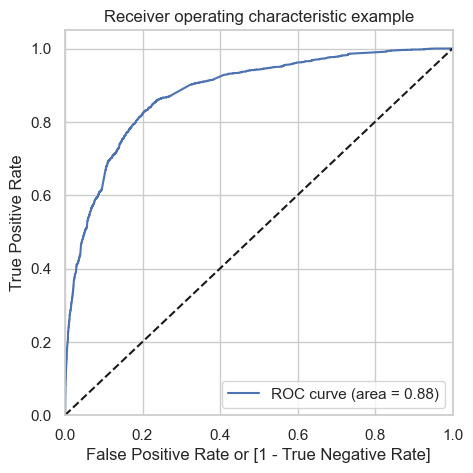

In [363]:
def draw_roc(actual, probs):
    fpr,tpr, threshold = metrics.roc_curve(actual, probs, drop_intermediate = True)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize = (5,5))
    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' %auc_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = 'lower right')
    plt.show()
    return None
 # Calling the function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)   

The ROC's 0.88 area under the curve is a very respectable value. So it appears that we have a sound model. To determine the best cutoff point, let's additionally examine the tradeoff between sensitivity and specificity.

In [364]:
# let's create columns with different probability cut-off
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_Prob.map(lambda x : 1 if x> i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.656479,1,1,1,1,1,1,1,1,0,0,0
1,1,0.730925,1,1,1,1,1,1,1,1,1,0,0
2,0,0.078035,0,1,0,0,0,0,0,0,0,0,0
3,0,0.255084,0,1,1,1,0,0,0,0,0,0,0
4,1,0.632282,1,1,1,1,1,1,1,1,0,0,0


Optimal cut-off probability is where we get balanced specificity and sensitivity

In [365]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1 = sum(sum(cm1))
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total1
    speci = cm1[0,0] / (cm1[0,0] + cm1[0,1])
    sensi = cm1[1,1] / (cm1[1,0] + cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.450768  0.997217  0.101423
0.1   0.1  0.559001  0.979324  0.290290
0.2   0.2  0.684137  0.941153  0.519827
0.3   0.3  0.789735  0.866402  0.740722
0.4   0.4  0.810203  0.807157  0.812150
0.5   0.5  0.812374  0.693837  0.888155
0.6   0.6  0.783222  0.537575  0.940264
0.7   0.7  0.747093  0.396819  0.971022
0.8   0.8  0.715460  0.295030  0.984240
0.9   0.9  0.676229  0.177336  0.995170


When the probability thresholds are very low, the sensitivity is very high and specificity is very low. Similarly, for larger probability thresholds, the sensitivity values are very low but the specificity values are very high. And at about 0.4, the three metrics seem to be almost equal with decent values and hence, we choose 0.4 as the optimal cut-off point. The following graph also showcases that at about 0.4, the three metrics intersect.
The optimal cut-off point exists where the values of accuracy, sensitivity, and specificity are fairly decent and almost equal

<AxesSubplot:xlabel='prob'>

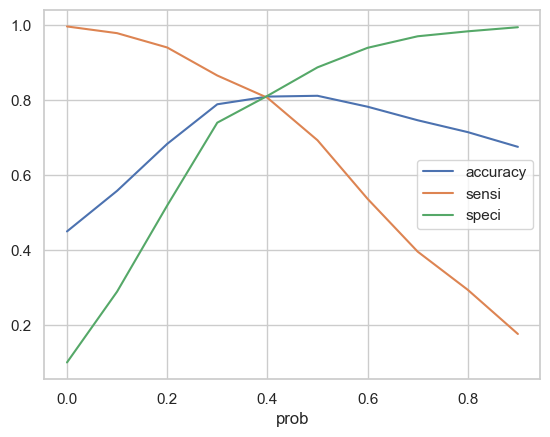

In [366]:
# let's plot accuracy, sensitivity and specificity for various probabilities
cutoff_df.plot.line(x = 'prob', y= ['accuracy','sensi','speci'])

From the above graph,we can see that 0.4 is the optimal probability

In [367]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [368]:
# Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8102031322685688


In [369]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion2

array([[3195,  739],
       [ 485, 2030]])

In [370]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP + FN)

0.6938369781312127

In [371]:
# Let's see the specificity of our logistic regression model

TN / float( TN + FP)

0.8881545500762582

Using sklearn utilities to calculate Precision and Recall

In [372]:
from sklearn.metrics import precision_score,recall_score

In [373]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7331166486096063

In [374]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8071570576540755

This cutoff point seems good to go!

Precision and Recall tradeoff

In [375]:
from sklearn.metrics import precision_recall_curve

In [376]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

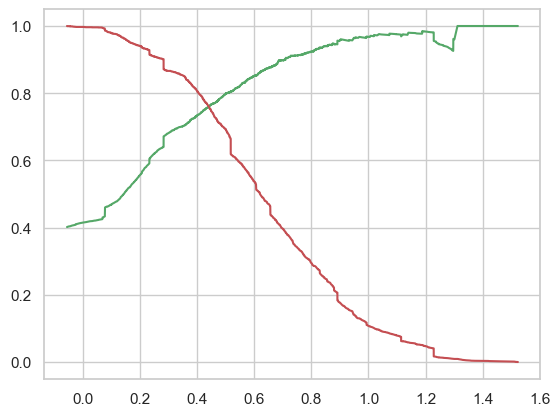

In [377]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

As you can see, the curve is similar to what you got for sensitivity and specificity. Except now, the curve for precision is quite jumpy towards the end. This is because the denominator of precision, i.e. (TP +FP) is not constant as these are the predicted values of 1s. And because the predicted values can swing wildly, you get a very jumpy curve.

Step 11: Making predictions on the test set

In [378]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [379]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,What is your current occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
8753,0,-0.438891,0,0,0,0,0,0,0,0,0,0,1,0,0
5029,0,-0.893058,0,0,0,0,0,0,0,0,0,0,0,0,0
7685,0,1.374144,0,0,0,0,0,0,0,0,1,0,0,0,0
8849,0,-0.742275,0,0,0,0,0,0,0,0,1,0,0,0,0
7901,0,0.269610,0,0,0,0,0,0,0,0,0,0,1,0,0


In [380]:
X_test_sm = sm.add_constant(X_test)

In [381]:
y_test_pred = lm.predict(X_test_sm)

In [382]:
y_test_pred[:10]

8753    0.157970
5029    0.356723
7685    0.550233
8849    0.150449
7901    0.291803
9236    0.438395
7437    0.078035
7618    0.283496
5451    0.606692
3577    0.319971
dtype: float64

In [383]:
#Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [384]:
# converting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)

In [385]:
# Removing index from both dataframe to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [386]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_pred_1, y_test_df], axis=1)

In [387]:
y_pred_final.head()

,0,Converted
0,0.157970,0
1,0.356723,0
2,0.550233,1
3,0.150449,0
4,0.291803,0


In [388]:
y_pred_final = y_pred_final.rename(columns= {0: "Converted_Prob"})

In [389]:
y_pred_final.head()

,Converted_Prob,Converted
0,0.157970,0
1,0.356723,0
2,0.550233,1
3,0.150449,0
4,0.291803,0


In [390]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x>0.4 else 0)
y_pred_final.head()

,Converted_Prob,Converted,final_predicted
0,0.157970,0,0
1,0.356723,0,0
2,0.550233,1,1
3,0.150449,0,0
4,0.291803,0,0


In [391]:
#Let's check the overall accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8050632911392405

In [392]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[1393,  333],
       [ 206,  833]])

In [393]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [394]:
# Let's see the precision of our logistic regression model
TP / float(TP+FP)

0.7144082332761578

In [395]:
# Let us calculate recall
TP / float(TP+FN)

0.8017324350336862

##### Final Observation:
Let us compare the values obtained for Train and Test dataset:

Train Data: 
- Accuracy  : 81%
- Precision : 73%
- Recall    : 80% 

<br><br>

Test Data: 
- Accuracy    : 80%
- Precision   : 71%
- Recall      : 80%

The metrics seem to hold true on the test dataset as well. So, it looks like you have created a decent model for the leads dataset as the metrics are decent for both the training and test datasets.

#### Summary

Many leads are generated in the first stage (top), but few of them turn into paying clients in the second stage. To increase lead conversion, you must properly nurture the potential leads during the middle stage (e.g., by educating the leads about the product and maintaining ongoing communication). Sort out the top prospects first from your generated leads. 'Total Visits', 'Total Time Spent on Website', and 'Page Views Per Visit' are the three metrics that most influence the likelihood that a lead will be converted. Then, you need to keep a list of leads close to hand so you can let them know about new programmes, services, job openings, and upcoming higher education.Keep a close eye on each lead so you can customise the information you provide to them. Carefully present career opportunities, information, or training programmes that best suit the leads' interests. A good strategy for identifying each lead's demands can help you convert leads into customers. Pay attention to leads that have been converted. Engage leads in question-and-answer sessions to gather the pertinent data you require about them. To find out if the leads want to join in online courses, make more queries and appointments with them. 